<a href="https://colab.research.google.com/github/andytambe31/DSEM/blob/main/Assignment_No_1_DSEM_Aniruddha_Tambe_002101113.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment No.1 - Data Science Engg Methods & Tools

 **Student Name: Aniruddha Tambe**

 **NU ID: 002101113**


## Abstract

The dataset contains data collected from a gas turbine located near Turkey's north western region. A set of 11 sensors are outputting aggregated data per hour(numerical data), which is used to study gas emissions of CO2 and NOx. This data can be used to predict the turbine energy yield using the ambient variable features. The source website also mentioned that we must use first 3 year i.e. from 2011 to 2013 as our training dataset and the rest as test set i.e. from 2014 & 2015

## Problem Statement

By using the above described dataset, we want to peform EDA and answer the assignments questions. To achieve this task we will use the open source libraries of NumPy, pandas, matplotlib, seaborn & scikit-learn.

In [131]:
#@title
# Creating a function for subplotting

def sub_plot(data_frame,col,row, plot_type="none",ignore='null'):
  
  fig, ax = plt.subplots(row, col,figsize=(15,15))
  plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=1.0,wspace=0.4,hspace=0.4)
  
  
  # pointers
  i = 0
  j = 0
  k = 0

  for var_name in data_frame.columns:

    try:

      if var_name == ignore:
        continue

            # Plot
      if plot_type == 'histogram':
        if col != 1:
          ax[i,j].hist(data_frame[var_name],density=True)
          ax[i,j].set_title(var_name)

        else:
            ax[j].hist(data_frame[var_name],density=True)
            ax[j].set_title(var_name)

      elif plot_type == 'box':

        if col != 1:
          ax[i,j].boxplot(data_frame[var_name])
          ax[i,j].set_title(var_name)

        else:
            ax[j].boxplot(data_frame[var_name])
            ax[j].set_title(var_name)

        
      

      #Increment col pointer
      j += 1

      # Increment row pointer to next row
      if j == col & col != 1:
        i += 1
        j = 0
    except:
      print("GO DS!!")
   


In [132]:
#@title
def drop_corr_columns(dFrame,threshold = 0.95,ignore='null'):

# Citation: https://chrisalbon.com/code/machine_learning/feature_selection/drop_highly_correlated_features/

  # Calculate the correlation matrix
  corr_matrix = dFrame.corr()

  # Get the upper triangle of the matrix
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

  # Find the index of feature columns with columns with correlation greater than threshold
  to_drop = [column for column in upper.columns if any(upper[column] >= threshold)]

  #Drop the columns
  print('Dropped columns:')
  to_drop.remove(ignore)
  print(to_drop)
  dFrame.drop(dFrame[to_drop], axis=1,inplace = True)

In [120]:
# Magic function for displaying matplotlib plots in the notebook
%matplotlib inline

#Imports for all the required libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as smf


# Make plots larger
plt.rcParams['figure.figsize'] = (10, 6)

#Importing data into a dataframe
data_2011 = pd.read_csv('https://raw.githubusercontent.com/andytambe31/DSEM/main/Dataset/gt_2011.csv')
data_2012 = pd.read_csv('https://raw.githubusercontent.com/andytambe31/DSEM/main/Dataset/gt_2012.csv')
data_2013 = pd.read_csv('https://raw.githubusercontent.com/andytambe31/DSEM/main/Dataset/gt_2013.csv')
data_2014 = pd.read_csv('https://raw.githubusercontent.com/andytambe31/DSEM/main/Dataset/gt_2014.csv')
data_2015 = pd.read_csv('https://raw.githubusercontent.com/andytambe31/DSEM/main/Dataset/gt_2015.csv')

#Merging each csv file into training and test set
data_train = pd.concat([data_2011,data_2012,data_2013])
data_test = pd.concat([data_2014,data_2015])


In [133]:
# Lets visualize both datasets
data_train.head() # This function returns first 5(default) rows

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898,0.32663,81.952
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892,0.44784,82.377
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042,0.45144,83.776
3,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990,0.23107,82.505
4,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910,0.26747,82.028


In [134]:
data_test.head() 

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,8.8358,1022.2,98.762,3.2422,23.152,1067.5,549.94,126.16,11.381,1.9157,68.292
1,9.0529,1021.8,97.464,3.2074,23.207,1067.9,549.80,126.51,11.476,2.0596,68.610
2,9.2464,1021.3,96.494,3.2051,23.296,1068.5,549.89,126.96,11.555,2.1621,68.324
3,9.3792,1020.9,95.912,3.2159,23.465,1069.6,549.94,127.83,11.539,2.1214,67.619
4,9.5757,1020.8,95.412,3.1898,23.205,1068.1,549.83,126.56,11.484,2.1549,66.499


In [135]:
# For getting the number of rows and columns in our dataset we use shape of the pandas dataframe
data_train.shape

(22191, 11)

## Let's take a look at some statistics

In [136]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22191 entries, 0 to 7151
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      22191 non-null  float64
 1   AP      22191 non-null  float64
 2   AH      22191 non-null  float64
 3   AFDP    22191 non-null  float64
 4   GTEP    22191 non-null  float64
 5   TIT     22191 non-null  float64
 6   TAT     22191 non-null  float64
 7   TEY     22191 non-null  float64
 8   CDP     22191 non-null  float64
 9   CO      22191 non-null  float64
 10  NOX     22191 non-null  float64
dtypes: float64(11)
memory usage: 2.0 MB


**Q. Which independent variables have null value? How much?**

For this dataset, the values doesn't have any nul values


In [137]:
data_train.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,22191.000000,22191.000000,22191.000000,22191.000000,22191.000000,22191.000000,22191.000000,22191.000000,22191.000000,22191.000000,22191.000000
mean,17.712247,1012.812607,79.555224,4.037750,25.317873,1083.080280,545.520170,133.537393,12.060208,2.214390,68.776529
std,7.352789,6.396588,13.915018,0.810223,4.234147,16.840765,7.708708,16.026107,1.114265,2.295746,11.036231
min,0.289850,985.850000,27.504000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.875400,0.000388,27.765000
25%,11.664500,1008.800000,70.294500,3.449850,22.736000,1074.600000,542.600000,124.260000,11.395000,0.995375,61.548000
50%,17.739000,1012.400000,82.781000,4.068800,24.989000,1088.100000,549.900000,133.770000,12.001000,1.524200,67.096000
75%,23.657000,1016.700000,90.532000,4.451400,26.839000,1095.300000,550.050000,138.645000,12.443500,2.542400,74.572000
max,34.929000,1034.200000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.910000


## We can see the range of both the dependent variable(TEY) and the independent varaibles is extremely different.

## Hence we need the scale the varaible before hand

In [103]:
# perform a robust scaler transform of the dataset
trans = MinMaxScaler()
data_train_scaled = trans.fit_transform(data_train)

# Convert the array back to a dataframe
data_train_scaled = pd.DataFrame(data_train_scaled,columns=data_train.columns)

In [138]:
data_test.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,8.8358,1022.2,98.762,3.2422,23.152,1067.5,549.94,126.16,11.381,1.9157,68.292
1,9.0529,1021.8,97.464,3.2074,23.207,1067.9,549.80,126.51,11.476,2.0596,68.610
2,9.2464,1021.3,96.494,3.2051,23.296,1068.5,549.89,126.96,11.555,2.1621,68.324
3,9.3792,1020.9,95.912,3.2159,23.465,1069.6,549.94,127.83,11.539,2.1214,67.619
4,9.5757,1020.8,95.412,3.1898,23.205,1068.1,549.83,126.56,11.484,2.1549,66.499


## We will do the same thing for our test set as well


In [139]:
data_test_scaled = trans.fit_transform(data_test)

# Convert the array back to a dataframe
data_test_scaled = pd.DataFrame(data_test_scaled,columns=data_test.columns)

In [140]:
data_test_scaled.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,0.347747,0.694915,0.982398,0.237742,0.236945,0.659184,0.983316,0.328888,0.288137,0.046576,0.452007
1,0.352757,0.686441,0.965323,0.230155,0.239334,0.663265,0.979778,0.333291,0.306037,0.050078,0.455399
2,0.357222,0.675847,0.952562,0.229654,0.243201,0.669388,0.982053,0.338953,0.320923,0.052572,0.452349
3,0.360286,0.667373,0.944906,0.232009,0.250543,0.680612,0.983316,0.349899,0.317908,0.051581,0.444831
4,0.364820,0.665254,0.938328,0.226318,0.239248,0.665306,0.980536,0.333920,0.307544,0.052397,0.432887


## **Q. Do the ranges of the predictor variables make sense?**

A. After intial inspection of the dataset we found that each an every variable had vastly different ranges, whic could hinder the prediction made by the model.To solve this problem, we scaled the columns using the MinMaxScaler

## Lets plot the histograms to find out how are these variables ditributed. Lets exclude the target variable.

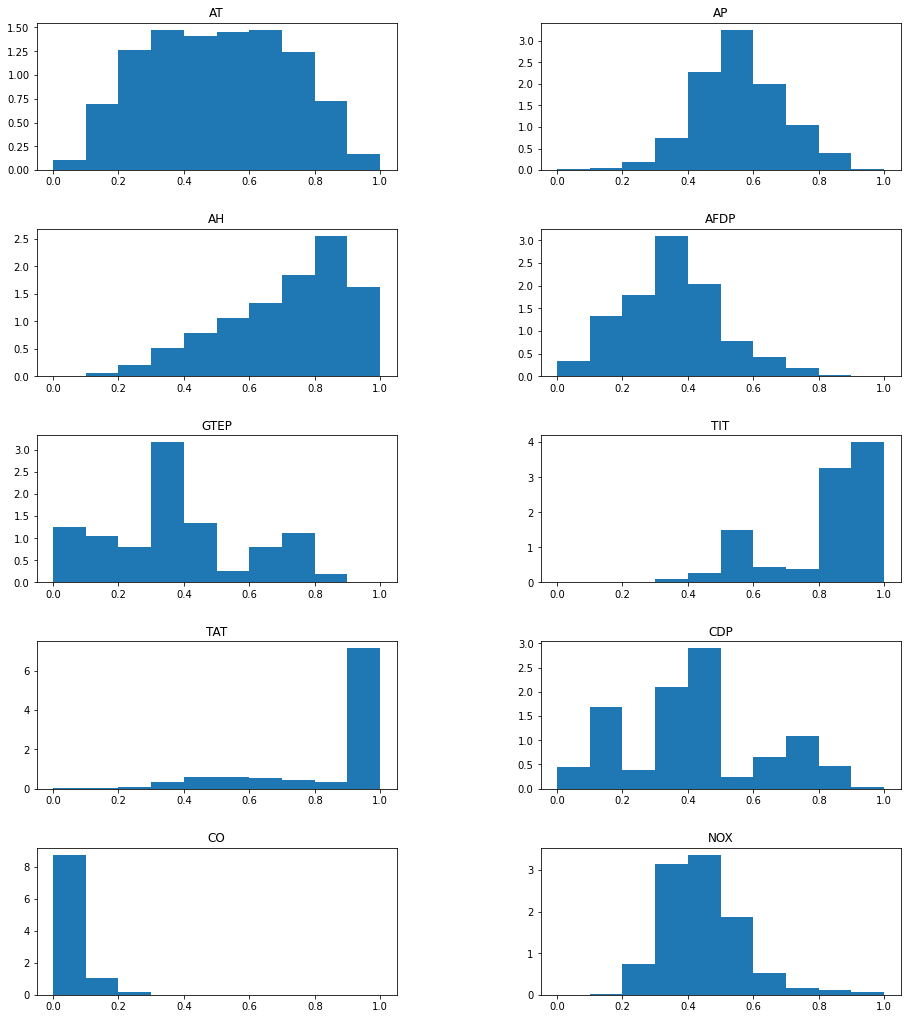

In [141]:
sub_plot(data_train_scaled,col = 2,row = 5,plot_type = 'histogram',ignore='TEY')

## **Q.What are the distributions of the predictor variables?**   

A. Here we can see variables like AT, AP & NOX are somewhat distributed normally, whereas remaining variables have somewhat of a skew for their ditributions like AH & AFDP. Variables like CO, TAT, CDP & TIT have certain values in them whose counts are much higher as compared to other values.

## Lets try to understand any correlation exists between the independent variables

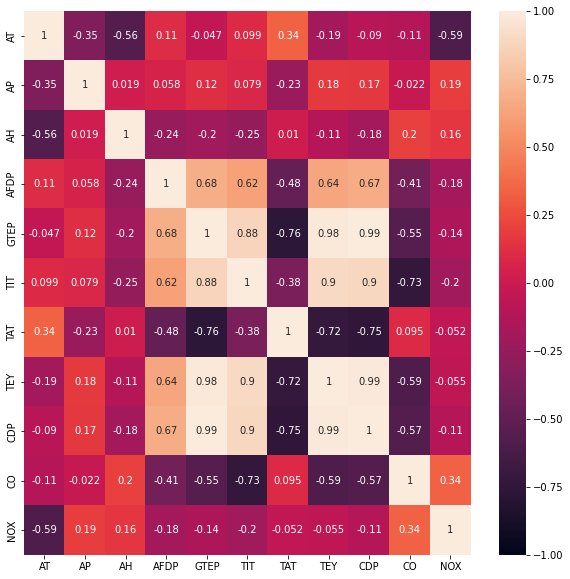

In [142]:
# For plotting a heatmap

plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(data_train_scaled.corr(), vmin=-1, vmax=1, annot=True)

### **Q. In the predictor variables, [are they] independent of all the other predictor variables?**

A. From this heat map you can clearly see there is some correlation between the independent varaibles. Some of them are dependent as seen with a value closer to 1.

## To answer the questions of 


**Which independent variables are useful to predict a target (dependent variable)?**

&

**Which predictor variables are the most important?**

We need to calculate the standardized coefficients of each variables, to determine the influence an independent variable has on the target variable.

For this, will fit the training data through a regression model and view the coefficients in the model summary.



In [128]:
reg_model = smf.OLS(data_train_scaled['TEY'], data_train_scaled[['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'CDP', 'CO',
       'NOX']]).fit()

In [129]:
##Lets get the summary of the model
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    TEY   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          4.694e+06
Date:                Sat, 25 Sep 2021   Prob (F-statistic):                        0.00
Time:                        03:27:27   Log-Likelihood:                          68984.
No. Observations:               22191   AIC:                                 -1.379e+05
Df Residuals:                   22181   BIC:                                 -1.379e+05
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AT            -0.1601      0.001   -211.078      0.000      -0.162      -0.159
AP            -0.0205      0.001    -35.122      0.000      -0.022      -0.019
AH             0.0052      0.001     10.295      0.000       0.004       0.006
AFDP          -0.0028      0.001     -4.091      0.000      -0.004      -0.001
GTEP           0.1946      0.005     40.173      0.000       0.185       0.204
TIT            0.5540      0.006     94.519      0.000       0.542       0.565
TAT           -0.1372      0.003    -42.439      0.000      -0.144      -0.131
CDP            0.3065      0.006     52.173      0.000       0.295       0.318
CO             0.0254      0.002     11.161      0.000       0.021       0.030
NOX           -0.0083      0.001     -9.545      0.000      -0.010      -0.007
==============================================================================
Omnibus:                     1358.724   Durbin-Watson:                   0.474
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4316.567
Skew:                          -0.281   Prob(JB):                         0.00
Kurtosis:                       5.086   Cond. No.                         202.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Which independent variables are useful to predict a target (dependent variable)?**

&

**Which predictor variables are the most important?**



A. Variables with the highest value of the standardized coeff can be consider to be most useful or most important variable.

## **Q. Do the training and test sets have the same data?**

A. For this we can plot the histograms for test set and compare them. Visually, most of the data seems to be similar.

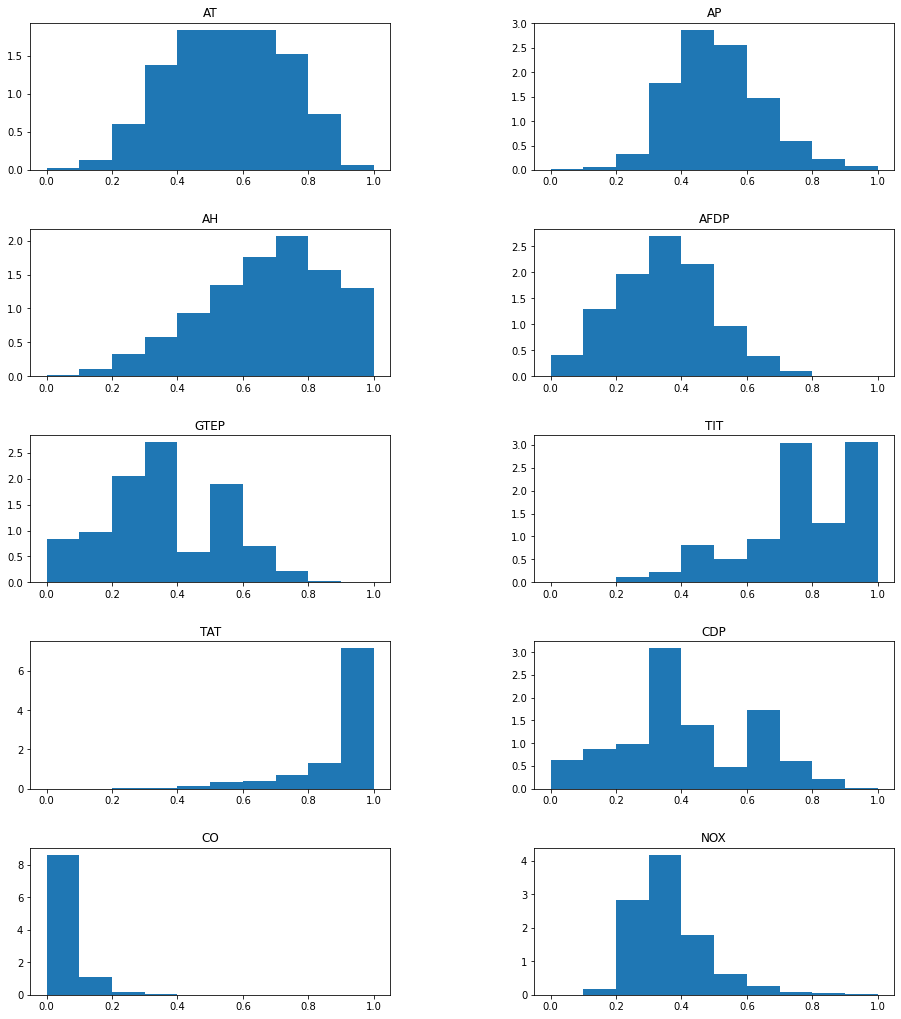

In [143]:
sub_plot(data_test_scaled,col = 2,row = 5,plot_type = 'histogram',ignore='TEY')

##References:

1. Canvas Notebooks - I2P_Data_Visualization_matplotlib.ipynb
2. How to Use StandardScaler and MinMaxScaler Transforms in Python - https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/
3. Python Data Science Handbook - https://jakevdp.github.io/PythonDataScienceHandbook/
4. Drop Highly Correlated Features -  https://chrisalbon.com/code/machine_learning/feature_selection/drop_highly_correlated_features/

Some of the coding techniques and concepts were used from the above sources.

## **Licensing**

All the above information is a part of an academic assignment and is free to be used, referenced, and modified to anyone who wishes to do so.